In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('Titanic.csv')

In [3]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [4]:
df.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [6]:
df.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


**Types of Features:**
#CATEGORICAL : SEX, EMBARKED
#DISCRETE: SIBSP,PARCH


In [12]:
s=pd.read_csv('train (1).csv')

In [13]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
t=pd.read_csv('test (1).csv')
t.shape
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [29]:
s.shape

(891, 12)

In [39]:
s.info()
s['Survived'].astype('int')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [40]:
df = pd.concat([s, t],axis=0)

In [41]:
df.shape

(1309, 12)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [38]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [45]:
df['Survived']=df['Survived'].fillna(df['Survived'].median())

In [46]:
df['Survived'].astype('int')

0      0
1      1
2      1
3      1
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: Survived, Length: 1309, dtype: int64

In [47]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])

In [48]:
df['Fare'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1309 entries, 0 to 417
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
1308 non-null   float64
dtypes: float64(1)
memory usage: 20.5 KB


In [49]:
df['Fare']=df['Fare'].fillna(df['Fare'].median())

In [50]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [52]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

<ipython-input-53-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

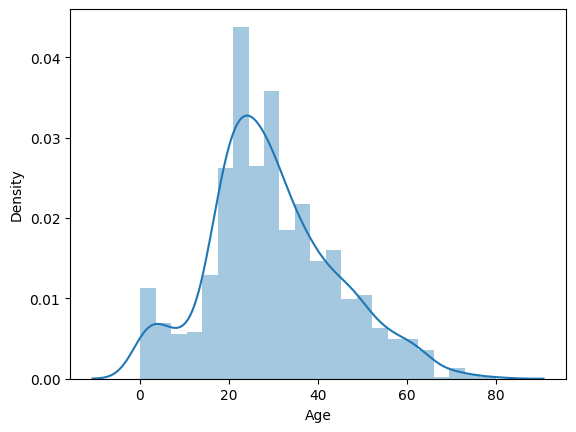

In [53]:
sns.distplot(df['Age'])

In [55]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [56]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [59]:
len(df['Cabin'].unique())

186

In [60]:
df['Embarked'].nunique()

3

In [65]:
df.drop(['Name','PassengerId'],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,1.0,1,female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,male,35.0,0,0,373450,8.0500,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...
413,0.0,3,male,28.0,0,0,A.5. 3236,8.0500,C23 C25 C27,S
414,0.0,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,0.0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C23 C25 C27,S
416,0.0,3,male,28.0,0,0,359309,8.0500,C23 C25 C27,S


In [67]:
df.duplicated().sum()

0

Numerical Analysis

<Axes: >

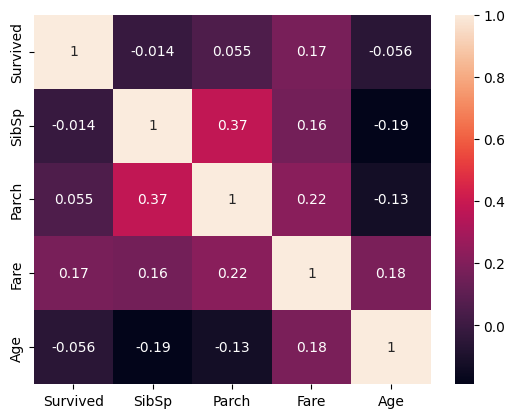

In [70]:
sns.heatmap(df[['Survived','SibSp','Parch','Fare','Age']].corr(),annot=True)

In [71]:
df['SibSp'].nunique()

7

Age

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 165.2+ KB


In [73]:
df['Survived']=df['Survived'].astype('int')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


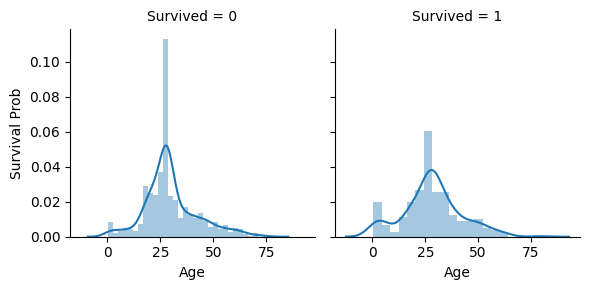

In [78]:
age_vis = sns.FacetGrid(df,col='Survived')
age_vis = age_vis.map(sns.distplot,'Age').set_ylabels('Survival Prob')

SEX


<Axes: xlabel='Sex', ylabel='Survived'>

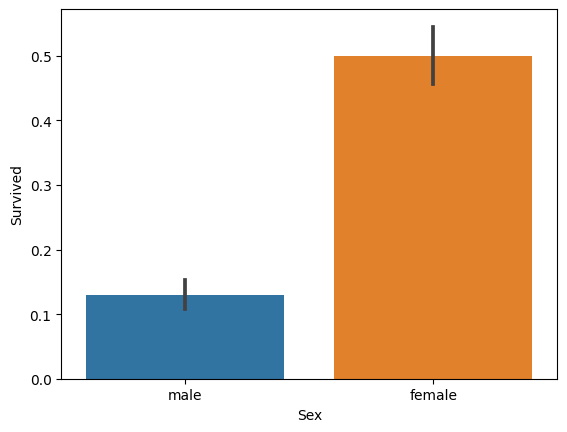

In [79]:
sns.barplot(x='Sex',y='Survived',data=df)

Females were given priority in saving than males


<Axes: xlabel='Pclass', ylabel='Survived'>

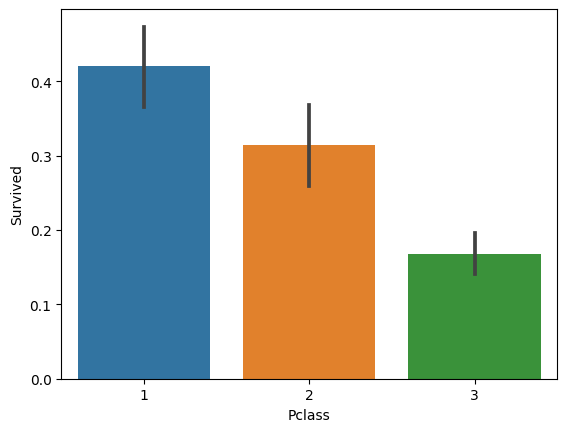

In [91]:
sns.barplot(x='Pclass',y='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

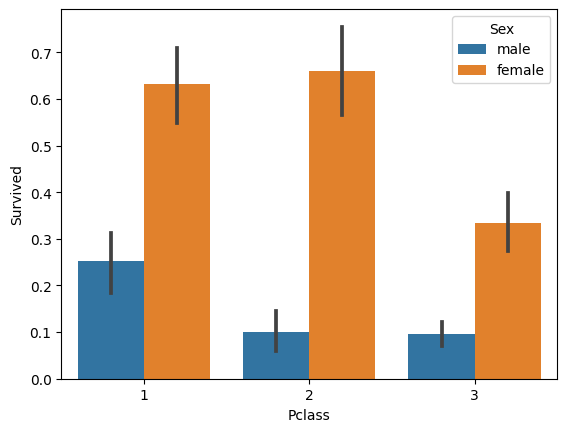

In [92]:
sns.barplot(x='Pclass',y='Survived',data=df,hue='Sex')

First class Fare is high followed by 2nd and 3rd class, So they are first saved then 2nd and 3rd,But females in 2nd class were given more preferences followed by 1st class females and then 3rd class females

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 165.2+ KB


In [87]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.5000
male      0.1293
Name: Survived, dtype: float64

In [90]:
df[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.5000
male,0.1293


Embarkment

In [95]:
df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

Ratio of S:C:Q

In [99]:
916/123

7.4471544715447155

In [98]:
270/123

2.1951219512195124

Ratio of Embarkement is (approx) 7:2:1. So for every 1 people from Q station there are about 7 people from S station and 2 from C station

<Axes: xlabel='Embarked', ylabel='Survived'>

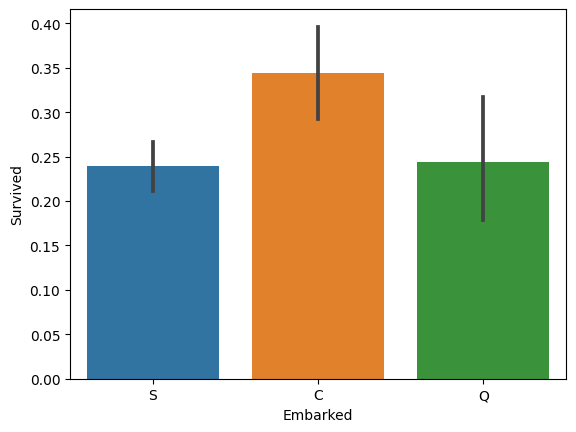

In [103]:
sns.barplot(x='Embarked',y='Survived',data=df)

<Axes: xlabel='Embarked', ylabel='Survived'>

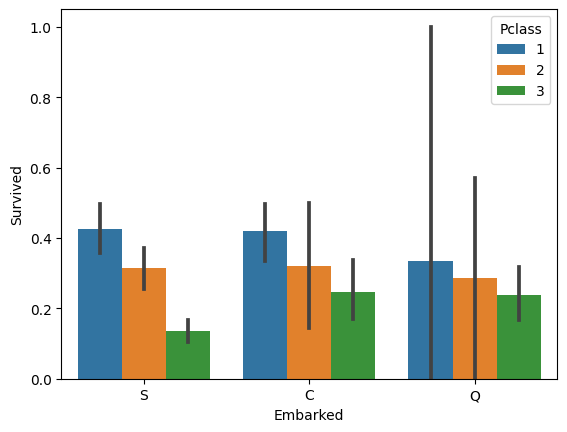

In [111]:
sns.barplot(x='Embarked',y='Survived',hue='Pclass',data=df)

<Axes: xlabel='Sex', ylabel='Count'>

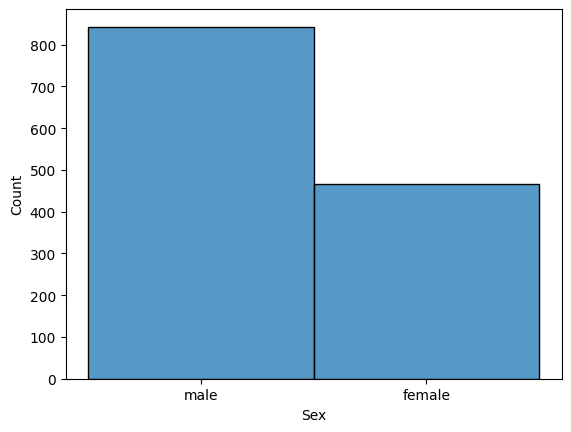

In [115]:
sns.histplot(x='Sex',data=df)


In [107]:
df=df.drop(['PassengerId','Name'],axis=1)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1309 non-null   float64
 8   Cabin     1309 non-null   object 
 9   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 144.8+ KB


DATA PREPARATION FOR ML CLASSIFICATION

Splitting Data

In [127]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [129]:
x.shape

(1309, 9)

In [130]:
y.shape

(1309,)

In [137]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Sex'].nunique()

2

In [138]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Cabin']= label_encoder.fit_transform(df['Cabin'])
df['Cabin'].nunique()
df['Embarked'].nunique()

186

In [135]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Embarked']= label_encoder.fit_transform(df['Embarked'])

Scaling